# Data Analyst Associate Practical Exam Submission

# Analysis of Food Claims Process

In [198]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import food_claims_2212.csv
food_claims = pd.read_csv('food_claims_2212.csv')

## Data set criteria
| Column Name | Criteria |
| --- | --- |
| `claim_id` | Nominal. The unique identifier of the claim. Missing values are not possible due to the database structure. |
| `time_to_close` | Discrete. The number of days to close the claim. Any positive value. Replace missing values with overall median time to close. |
| `claim_amount` | Continuous. The initial claim requested in the currency of Brazil, rounded to 2 decimal places. Replacing missing values with the overall median claim amount. |
| `amount_paid` | Continuous. Final amount paid. In the currency of Brazil. Rounded to 2 decimal places. Replace missing values with the overall median amount paid. |
| `location` | Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”. Remove missing values. |
| `individuals_on_claim` | Discrete. Number of individuals on this claim. Minimum 1 person. Replace missing value with 0. |
| `linked_cases` | Nominal. Whether this claim is linked to other cases. Either TRUE or FALSE. Replace missing values with FALSE. |
| `cause` | Nominal. Cause of the food poisoning. One of “vegetable”, “meat”, or “unknown”. Replace missing values with ‘unknown’. |

# Data Validation

## Quick overview of food_claims DataFrame
There are 8 columns and 2000 rows in this DataFrame. 
- The columns `amount_paid` and `linked_cases` show to have null values.
    - 36 null values in `amount_paid` and 26 null values in `linked_cases`
- The dtypes of `claim_amount`, `location`,`linked_cases`, and `cause` need to be changed for easier analysis.

In [199]:
# Quick view of first 5 rows in the DataFrame
food_claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [200]:
food_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [201]:
null_count = pd.DataFrame(food_claims.isna().sum(), columns=['null_count']).reset_index()
null_count

,index,null_count
0,claim_id,0
1,time_to_close,0
2,claim_amount,0
3,amount_paid,36
4,location,0
5,individuals_on_claim,0
6,linked_cases,26
7,cause,0


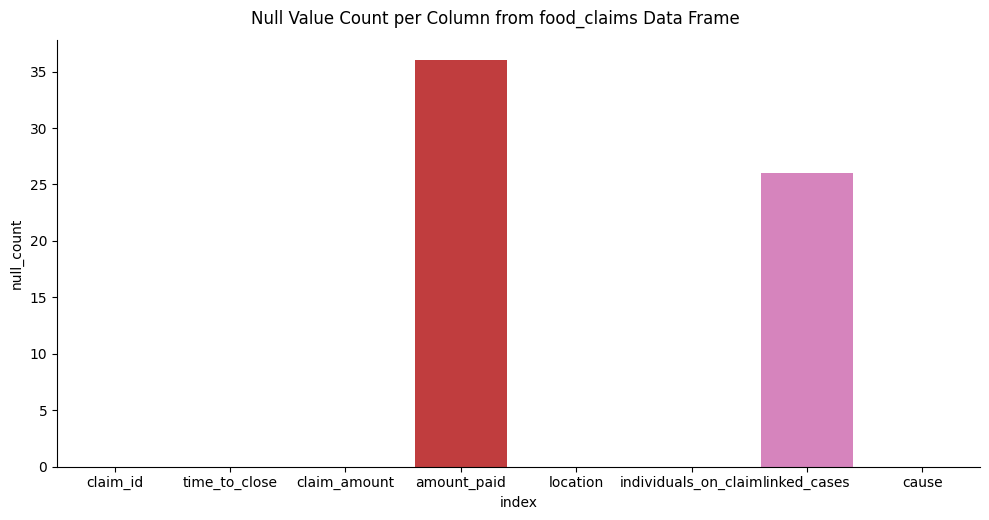

In [202]:
fig1 = sns.catplot(data=null_count, x='index',y='null_count',kind='bar',aspect=2/1)
fig1.fig.suptitle('Null Value Count per Column from food_claims Data Frame', y=1.03)
plt.show()

## claim_id column
The `claim_id` column is the unique identifier of the table. Row count ranges between 1 through 2000. 
- Using the `.duplicated()` method in pandas, we confirm that there are no duplicates found in this column.
- The dtype for the `claim_id` column is `int64` which is appropriate as a unique identifier.
`claim_id` matches the discription for the criteria of the column.

In [203]:
print('Duplicate values count:',food_claims.duplicated('claim_id').sum()) # Gives count of any duplicated values
print("The claim_id column's dtype is:",food_claims['claim_id'].dtype) # Returns column dtype
print(food_claims['claim_id'].isna().sum(), 'null values') # Counts null values

Duplicate values count: 0
The claim_id column's dtype is: int64
0 null values


## time_to_close column
The `time_to_close` column is the number of days to close the claim. 
- We verified that there are only positive values using `food_claims['time_to_close'] < 0).sum()`.
- The dtype for `time_to_close` is `int64` which is appropriate for this column.
- No missing values were found.
- There are 2000 rows of data in this column.
- Values range between 76 through 518.
`time_to_close` matches the discription for the criteria of the column.

In [204]:
print((food_claims['time_to_close'] < 0).sum(), 'negative values.') # Checking to see if any values are negative
print("The time_to_close column's dtype is:",food_claims['time_to_close'].dtype) # Returns column dtype
print(food_claims['time_to_close'].isna().sum(), 'null values.') # Counts null values
print(food_claims['time_to_close'].describe()) # Gives statistical summary of column

0 negative values.
The time_to_close column's dtype is: int64
0 null values.
count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64


## claim_amount column
The initial claim requested in the currency of Brazil, rounded to 2 decimal places.
- The dtype of `claim_amount` is object.
    -  Removed the 'R$' symbol from the string values using `str.replace()`.
    -  Then converted dtype from 'object' to 'float64' using `.astype()`.
- There are 2000 rows of data in this column with 0 null values.
- Values range between 1,637.94 through 76,106.80.
The `claim_amount` column now matches the criteria of the column.

In [205]:
print("The dtype of claim_amount before conversion is:",food_claims['claim_amount'].dtype) # Returns column dtype

# Removing the R$ from the string values.
food_claims['claim_amount'] = food_claims['claim_amount'].str.replace('R\$', '')

# Convert dtype from 'object' to 'float'. Rounding of values to 2 decimal places.
food_claims['claim_amount'] = food_claims['claim_amount'].astype('float').round(decimals=2)

print("The dtype of claim_amount after conversion is:",food_claims['claim_amount'].dtype) # Returns column dtype
print(food_claims['claim_amount'])

The dtype of claim_amount before conversion is: object
The dtype of claim_amount after conversion is: float64
0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64


In [206]:
print(food_claims['claim_amount'].isna().sum(), 'null values.') # Counts null values
print(food_claims['claim_amount'].describe()) # Gives statistical summary of column

0 null values.
count     2000.000000
mean     27156.965235
std      16195.783099
min       1637.940000
25%      13758.952500
50%      24821.085000
75%      38581.350000
max      76106.800000
Name: claim_amount, dtype: float64


## amount_paid column
Final amount paid. In the currency of Brazil, Rounded to 2 decimal places.
- The dtype of `amount_paid` is `float64` which is appropriate for this column.
- The `amount_paid` column has 36 null values.
    - Per the criteria discription, missing values are to be replaced with the overall median amount paid.
    - Calculated the median of the column using the `.median()` method. 
        - Overall median is: 20,105.7 Rounded.
    - Used the `.fillna()` method to replace null values with the overall median of `amount_paid`.
- Conferming the rounding of 2 decimal places using the `.round()` method.
- Values range between 1,516.72 through 52,498.75.

The `amount_paid` column now matches the description of the criteria.

In [207]:
print("The amount_paid column's dtype is:",food_claims['amount_paid'].dtype) # Returns column dtype
print(food_claims['amount_paid'].isna().sum(), 'null values.') # Counts null values

The amount_paid column's dtype is: float64
36 null values.


In [208]:
# Calculating median of 'amount_paid'
median_amount_paid = food_claims['amount_paid'].median()
print('Overall median of amount_paid:',median_amount_paid)

# Replacing null values with median_amount_paid
food_claims['amount_paid'] = food_claims['amount_paid'].fillna(value=median_amount_paid)

# Rounding of 'amount_paid' column to 2 decimal places.
food_claims['amount_paid'] = food_claims['amount_paid'].round(decimals=2)

# Counting null values to confirm replacement of values.
print('Null value count after replacing null values:',food_claims['amount_paid'].isna().sum())
print(food_claims['amount_paid'].describe()) # Gives statistical summary of column

Overall median of amount_paid: 20105.699999999997
Null value count after replacing null values: 0
count     2000.000000
mean     21516.122230
std      12418.285043
min       1516.720000
25%      11106.652500
50%      20105.700000
75%      30472.895000
max      52498.750000
Name: amount_paid, dtype: float64


## location column
Location of the claim.
- Expected values are: "RECIFE", "SAO LUIS", "FORTALEZA", OR "NATAL"
- Using the `.unique()` method, we confirmed that the expected 4 values of the column are the only ones there. No need to remove missing values.
- The dtype of `location` is `object`. It makes more sense to convert dtype to `category` using the `.astype()` method since this is considered to be nominal data.
- There are no null values in this column.

The `location` column now matches the description of the criteria.

In [209]:
print("The location column's dtype is:",food_claims['location'].dtype) # Returns column dtype
print('Category list in column:', food_claims['location'].unique()) # Gives list of values.
print(food_claims['location'].isna().sum(), 'null values.') # Counts null values


The location column's dtype is: object
Category list in column: ['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
0 null values.


In [210]:
# Converting dtype from object to category
food_claims['location'] = food_claims['location'].astype('category')

print("The location column's dtype after conversion: ",food_claims['location'].dtype) # Confirming conversion.

The location column's dtype after conversion:  category


## individuals_on_claim column
Number of individuals on this claim. Minimum 1 person per row.
- No values are less than the minimum of one.
    - Confirmed using the code `(food_claims['individuals_on_claim'] < 1).sum()`.
- There are no null values in this column.
- The dtype of `individuals_on_claim` is `int64` which is appropriate for this column.
`individuals_on_claim` matches the description for the criteria of the column.

In [211]:
print('Count of rows less than 1:', (food_claims['individuals_on_claim'] < 1).sum()) # Gives count of values less than 1.
print(food_claims['individuals_on_claim'].isna().sum(), 'null values.') # Counts null values
print("The individuals_on_claim column's dtype is:",food_claims['individuals_on_claim'].dtype) # Returns column dtype


Count of rows less than 1: 0
0 null values.
The individuals_on_claim column's dtype is: int64


## linked_cases column
Whether this claim is linked to other cases. TRUE or FALSE.
- There are 26 null values in this column.
    - Per the description of the criteria, we will replace missing values with FALSE using `.str.replace()` method.
- The dtype of this column is `object`. 
    - Since this column is expected to be True or False it would make more sense to convert this into a `'boolean'` dtype.
`linked_cases` column now matches the description of the criteria.

In [212]:
print(food_claims['linked_cases'].isna().sum(), 'null values.') # Counts null values
print("The linked_cases column's dtype is:",food_claims['linked_cases'].dtype) # Returns column dtype
print('The unique values for the column:',food_claims['linked_cases'].unique()) # gives the type of values in the column.

26 null values.
The linked_cases column's dtype is: object
The unique values for the column: [False True nan]


In [213]:
# Replacing null with False value
food_claims['linked_cases'] = food_claims['linked_cases'].fillna('False')
print(food_claims['linked_cases'].isna().sum(), 'null values after conversion.') # gives new null value count.

# Changing dtype from 'object' to 'bool'
food_claims['linked_cases'] = food_claims['linked_cases'].astype('bool')
print("The column's dtype after conversion is:", food_claims['linked_cases'].dtype)
print('The unique values for the column:',food_claims['linked_cases'].unique()) # gives the type of values in the column.

0 null values after conversion.
The column's dtype after conversion is: bool
The unique values for the column: [False  True]


## cause column
The cause of the food poisoning.
- There are no null values in this column.
- Expected values are "vegetable", "meat", or "unknown".
    - There were 2 additional values found using the `.unique()` method.
    - The additional values were: `" Meat"` with a space before the capital M and `"VEGETABLES"` in all caps with an extra `"S"`.
    - Removed spaces from all values using the `.str.replace(" ","")` method.
    - Converted `"VEGETABLES"` value to be `"vegetable"` using `.str.replace("VEGETABLES","vegetable")`
    - Converted all values to be lowercase by using the `.str.lower()` method.
- The dtype of the column was `object`
    - As a nominal value it would make more sense to make this a `category` dtype.
The `cause` column now matches the description from the criteria.

In [214]:
print(food_claims['cause'].isna().sum(), 'null values.') # Counts null values
print('The unique values for the column:',food_claims['cause'].unique()) # gives the type of values in the column.

0 null values.
The unique values for the column: ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


In [215]:
# Removing additional space from values.
food_claims['cause'] = food_claims['cause'].str.replace(" ","")

# Changing "VEGETABLES" to "vegetable"
food_claims['cause'] = food_claims['cause'].str.replace("VEGETABLES","vegetable")

# converting all values to be lower case.
food_claims['cause'] = food_claims['cause'].str.lower()

# Changing dtype from 'object' to 'category'
food_claims['cause'] = food_claims['cause'].astype('category')

food_claims['cause'].unique()

['unknown', 'meat', 'vegetable']
Categories (3, object): ['meat', 'unknown', 'vegetable']

## Quick review of food_claims after cleaning of data.
All columns match the description of the criteria, and all null values were replaced with appropriate values based on the criteria description from the table.

In [216]:
food_claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [217]:
food_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   claim_id              2000 non-null   int64   
 1   time_to_close         2000 non-null   int64   
 2   claim_amount          2000 non-null   float64 
 3   amount_paid           2000 non-null   float64 
 4   location              2000 non-null   category
 5   individuals_on_claim  2000 non-null   int64   
 6   linked_cases          2000 non-null   bool    
 7   cause                 2000 non-null   category
dtypes: bool(1), category(2), float64(2), int64(3)
memory usage: 84.4 KB


In [218]:
food_claims_col = food_claims.columns

null_value_count = []
for col in food_claims_col:
    null_value_count.append(
        food_claims[col].isna().sum())

nul_val = pd.DataFrame({
    'column':food_claims_col, 'null_value_count':null_value_count
})

print('Null Value Count per Column from food_claims Data Frame after cleaning:')
print(nul_val)

Null Value Count per Column from food_claims Data Frame after cleaning:
                 column  null_value_count
0              claim_id                 0
1         time_to_close                 0
2          claim_amount                 0
3           amount_paid                 0
4              location                 0
5  individuals_on_claim                 0
6          linked_cases                 0
7                 cause                 0


# Claim Count Analysis

## The number of claims for each location
### "RECIFE" has the most observations
The location that receives the most claims for each location is "RECIFE" at 885, followed by "SAO LUIS" at 517.
- 44% of the count are from the "RECIFE" location and 26% is from "SAO LUIS".
    - **70%** of all claims are caused by "RECIFE" and "SAO LUIS". 
    - **"RECIFE"** is heavily increasing the count of most claims in all locations.
- The "NATAL" location has the lowest amount of claims. 
This difference between all categories in claim count shows that the observations are not balanced between each category because of the amount of claims that "RECIFE" and "SAO LUIS" have.
- Location does affect the volume of cases recieved overall.

In [219]:
# Counting the number of claims by each location.
location_count = pd.DataFrame(food_claims.value_counts('location'),columns=['location_count']).reset_index()
location_count['percent'] = (location_count['location_count'] / location_count['location_count'].sum()).round(decimals=2)
location_count

,location,location_count,percent
0,RECIFE,885,0.44
1,SAO LUIS,517,0.26
2,FORTALEZA,311,0.16
3,NATAL,287,0.14


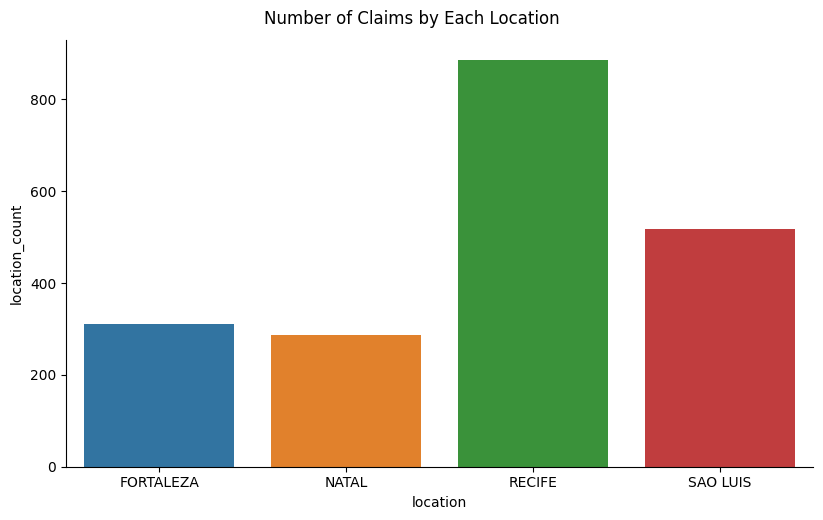

In [220]:
# Visualizing location_count DataFrame
fig2 = sns.catplot(data=location_count, x='location', y='location_count', kind='bar',aspect=5/3)

fig2.fig.suptitle('Number of Claims by Each Location', y=1.03)
plt.show()

## Number of Claims by Cause per Location
"RECIFE" has the most number of each claim value.
- `meat` is the most common cause for a claim for all locations.
- `vegetable` is the least common cause for a claim in all locations.

location   cause    
FORTALEZA  meat         169
           unknown       95
           vegetable     47
NATAL      meat         142
           unknown      102
           vegetable     43
RECIFE     meat         417
           unknown      322
           vegetable    146
SAO LUIS   meat         229
           unknown      194
           vegetable     94
dtype: int64


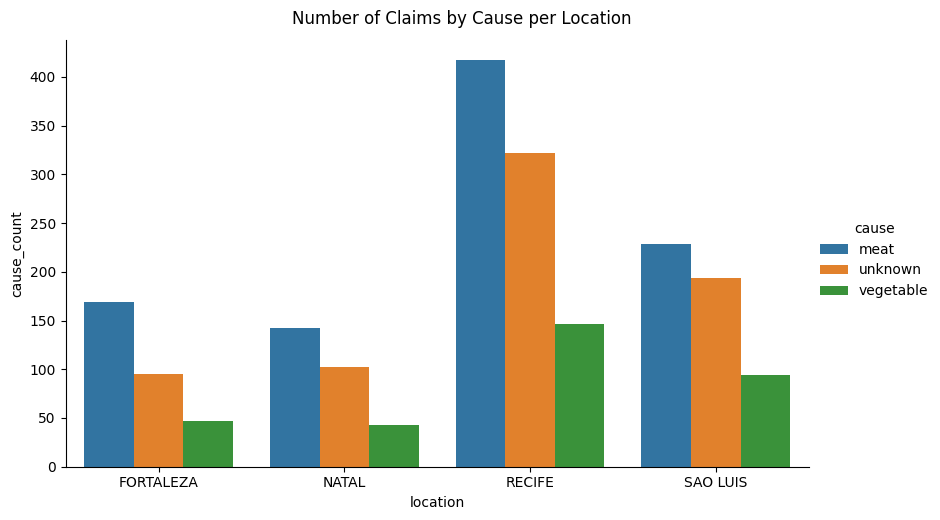

In [221]:
# Counting number of claims by cause per location.
claims_count_per_location = food_claims.groupby('location')[['cause']].value_counts()
print(claims_count_per_location)

# Create visulization of claims_count_per_location.
claims_count_per_loc_viz = claims_count_per_location.reset_index()
claims_count_per_loc_viz = claims_count_per_loc_viz.rename(columns={0:'cause_count'})

fig4 = sns.catplot(data=claims_count_per_loc_viz,x='location',y='cause_count',kind='bar',hue='cause', aspect=5/3)

fig4.fig.suptitle('Number of Claims by Cause per Location', y=1.03)
plt.show()

# Time to Close Analysis

## Distribution of time_to_close for all claims.
- The histogram of `time_to_close` is heavily right-skewed due to many outliers. Meaning that the majority of cases do not take as long to close.
- The mean of `time_to_close` is **185.6 days**, and the median of `time_to_close` is **179.0** days.
- The best measure of center to use would be the median of 179 days.

The variance of time_to_close is : **2415.83** days and the standard deviation is: **49.15** days.

In [222]:
time_to_close_var = np.var(food_claims['time_to_close']).round(2) # Variance of time_to_close
time_to_close_sd = np.std(food_claims['time_to_close']).round(2) # Standard Deviation of time_to_close

print('Variance:',time_to_close_var)
print('Standard Deviation:',time_to_close_sd)


Variance: 2415.83
Standard Deviation: 49.15


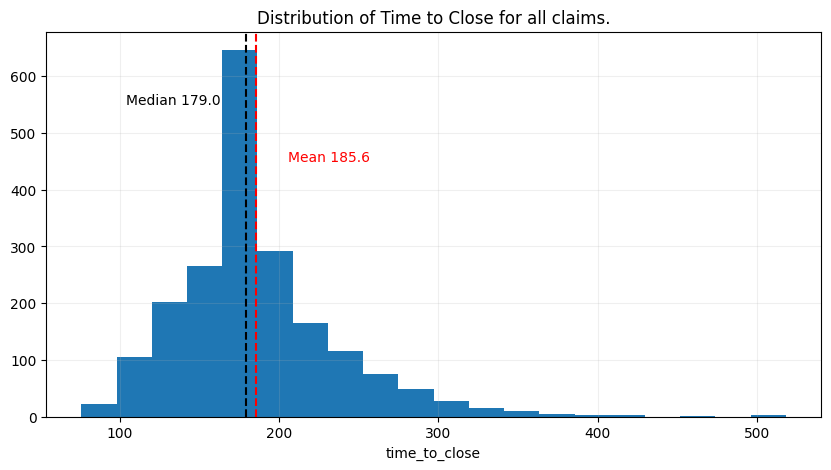

In [223]:
# Calculate mean and median
ttc_mean = food_claims['time_to_close'].mean().round(decimals=1)
ttc_median = food_claims['time_to_close'].median().round(decimals=1)

# Visualize histogram of 'time_to_close' column.
plt.figure(figsize=(10,5))
plt.hist(food_claims['time_to_close'],bins=20)

plt.annotate('Median {}'.format(ttc_median),xy=(ttc_median-75,550))
plt.annotate('Mean {}'.format(ttc_mean), xy=(ttc_mean+20,450),color='red')
plt.axvline(x=ttc_median,color='black',linestyle='--')
plt.axvline(x=ttc_mean,color='red',linestyle='--')
plt.xlabel('time_to_close')
plt.title('Distribution of Time to Close for all claims.')
plt.grid(visible=True, alpha=0.2)
plt.show()

### Count of outliers causing the skew in distribution.
Visualising the `time_to_close` column as a boxplot, we can see that there are many outliers in the data.
- There are **120 outliers** in the data.
    - This is about 6% of all values. The effect on time spent closing cases is not greatly affected by these outliers.

Number of outliers in time_to_close: 120
Ratio of outliers vs total: 0.06


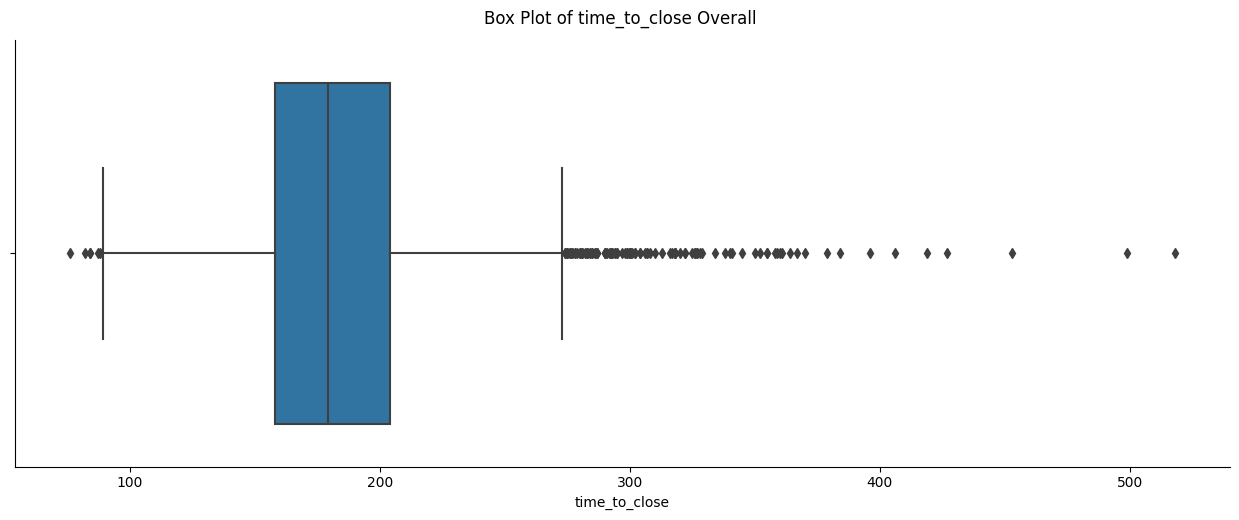

In [226]:
# Identifying outliers by cause.
from scipy.stats import iqr
iqr = iqr(food_claims['time_to_close'])
lower_threshold = np.quantile(food_claims['time_to_close'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(food_claims['time_to_close'], 0.75) + 1.5 * iqr

outliers = food_claims[(food_claims['time_to_close'] < lower_threshold) | (food_claims['time_to_close'] > upper_threshold)]

print('Number of outliers in time_to_close:',outliers.shape[0]) # Shows amount of rows to be outliers.
print('Ratio of outliers vs total:', (outliers.shape[0] / food_claims.shape[0]))

# Visualizing food_claims
fig5 = sns.catplot(data=food_claims, kind='box', x='time_to_close',aspect=5/2)

fig5.fig.suptitle('Box Plot of time_to_close Overall', y=1.03)
plt.show()

## Removal of outliers in the visual.
Rows left over after removal of outliers is 1880
- The median value changed from **179** days to **177** days after removing outliers.
    - Difference between median values is **2** days.
- The average changed from **185.6** days to **178.1** days after removing outliers. 
    - Difference between averages is **7.5** days.

The outliers in `time_to_close` seem to be increasing the average time to close a case by 7.5 days.

Rows left over after removal of outliers: 1880


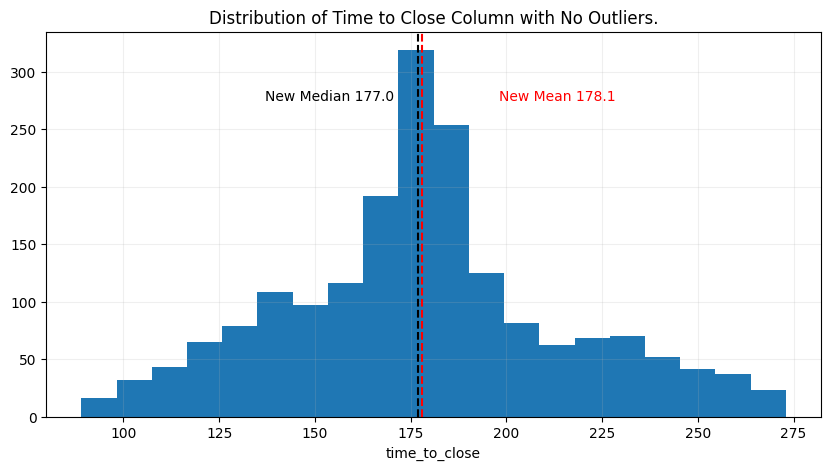

In [177]:
# creating a DataFrame where the outlier rows are removed from food_claims
no_outliers = food_claims[~((food_claims['time_to_close'] < lower_threshold) | (food_claims['time_to_close'] > upper_threshold))]
print('Rows left over after removal of outliers:',no_outliers.shape[0])

# Calculate mean and median
ttc_mean = no_outliers['time_to_close'].mean().round(decimals=1)
ttc_median = no_outliers['time_to_close'].median().round(decimals=1)

# Visualize histogram of 'time_to_close' column.
plt.figure(figsize=(10,5))
plt.hist(no_outliers['time_to_close'],bins=20)


plt.annotate('New Median {}'.format(ttc_median),xy=(ttc_median-40,275))
plt.annotate('New Mean {}'.format(ttc_mean), xy=(ttc_mean+20,275),color='red')
plt.axvline(x=ttc_median,color='black',linestyle='--')
plt.axvline(x=ttc_mean,color='red',linestyle='--')
plt.xlabel('time_to_close')
plt.title('Distribution of Time to Close Column with No Outliers.')
plt.grid(visible=True, alpha=0.2)
plt.show()

# Relationship Analysis between time_to_close and location

## The relationship between time_to_close and location.
Visualizing each location's `time_to_close` values using boxplots, they look very similar. 
- The median time spent is longest in the "FORTALEZA" location by **180** days. The shortest is "RECIFE" by **178** days.
- "SAO LUIS" has the highest average time_to_close by **187.17** days. 

The amount of time spent handling each case is not greatly affected by location. 

             mean  median
location                 
FORTALEZA  185.31   180.0
NATAL      185.93   179.0
RECIFE     184.61   178.0
SAO LUIS   187.17   179.0
               var    std
location                 
FORTALEZA  2264.14  47.58
NATAL      2214.56  47.06
RECIFE     2305.27  48.01
SAO LUIS   2822.38  53.13


Text(0.5, 1.03, 'Distribution of time_to_close between Locations')

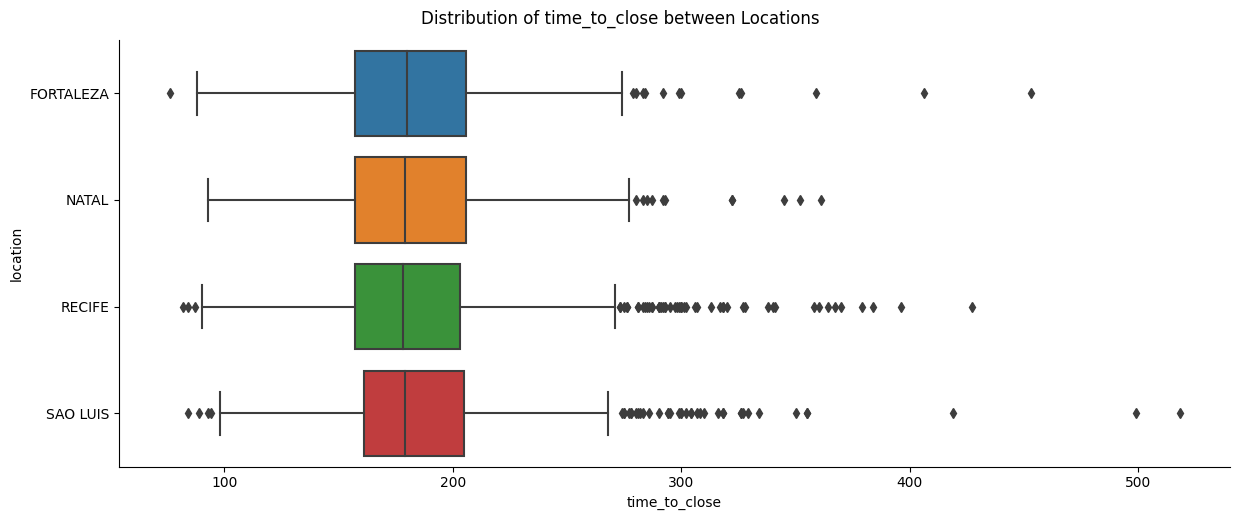

In [193]:
print(food_claims.groupby('location')['time_to_close'].agg([np.mean,np.median]).round(2))
print(food_claims.groupby('location')['time_to_close'].agg([np.var,np.std]).round(2)) # Variance and standard deviation

# Visualize time_to_close between locations through boxplot
fig6 = sns.catplot(data=food_claims, kind='box', x='time_to_close',y='location',aspect=5/2)

fig6.fig.suptitle('Distribution of time_to_close between Locations',y=1.03)